# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# To have as a test for running the code as I work on project 
# test = cities[:10]
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_min']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | serchhip
Processing Record 5 of Set 1 | malango
Processing Record 6 of Set 1 | neftegorsk
Processing Record 7 of Set 1 | dzilam gonzalez
Processing Record 8 of Set 1 | whyalla stuart
City not found. Skipping...
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | acarau
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | al jawf
Processing Record 13 of Set 1 | puerto rico
Processing Record 14 of Set 1 | kataragama
City not found. Skipping...
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | taksimo
Processing Record 19 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 20 of Set 1 | arraial do cabo
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,301.14,69,75,4.63,CC,1734081592
1,port-aux-francais,-49.3500,70.2167,278.47,81,55,15.67,TF,1734081593
2,grytviken,-54.2811,-36.5092,277.90,57,45,3.74,GS,1734081595
3,serchhip,23.3000,92.8333,300.59,20,96,1.45,IN,1734081596
4,malango,-2.9627,119.9001,295.28,98,100,0.17,ID,1734081597


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,301.14,69,75,4.63,CC,1734081592
1,port-aux-francais,-49.3500,70.2167,278.47,81,55,15.67,TF,1734081593
2,grytviken,-54.2811,-36.5092,277.90,57,45,3.74,GS,1734081595
3,serchhip,23.3000,92.8333,300.59,20,96,1.45,IN,1734081596
4,malango,-2.9627,119.9001,295.28,98,100,0.17,ID,1734081597


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

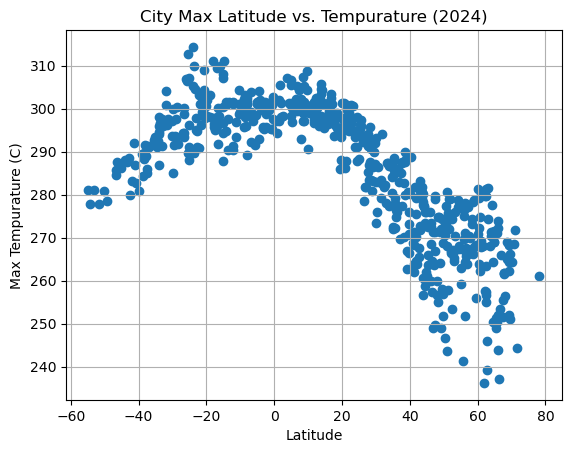

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (C)')
plt.title('City Max Latitude vs. Tempurature (2024)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

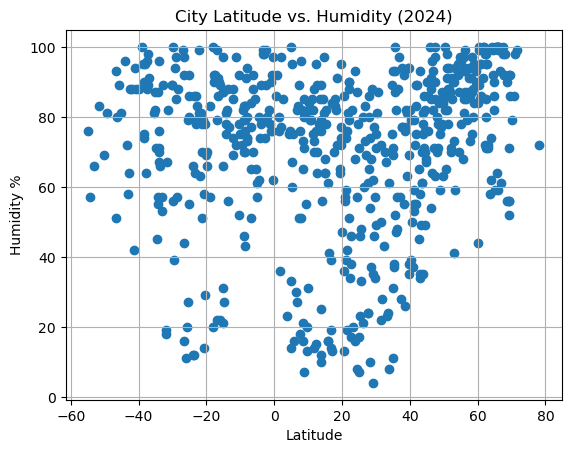

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2024)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

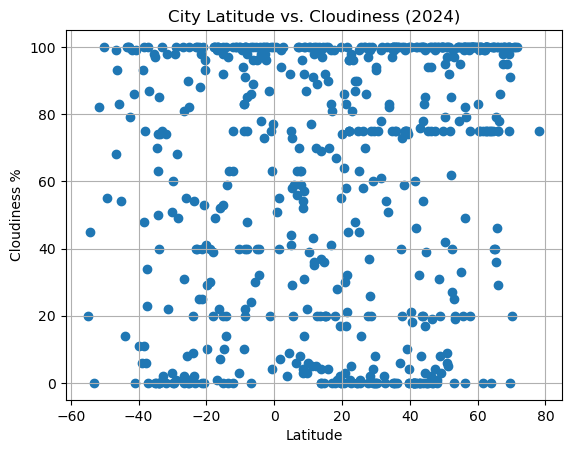

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness (2024)')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

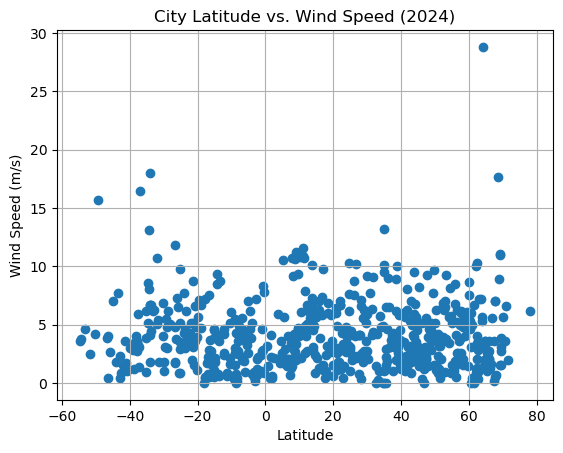

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

from scipy import stats


def calc_lin_req(lat,yvar):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(lat,yvar)
    regress_values = lat * slope + intercept
    return regress_values,slope,intercept,rvalue


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,serchhip,23.3000,92.8333,300.59,20,96,1.45,IN,1734081596
5,neftegorsk,52.8020,51.1660,267.17,90,99,6.26,RU,1734081598
6,dzilam gonzalez,21.2833,-88.9333,294.93,59,83,2.98,MX,1734081600
9,wailua homesteads,22.0669,-159.3780,294.89,90,75,6.69,US,1734081605
10,al jawf,29.5000,38.7500,289.95,46,0,5.73,SA,1734081607


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,301.14,69,75,4.63,CC,1734081592
1,port-aux-francais,-49.3500,70.2167,278.47,81,55,15.67,TF,1734081593
2,grytviken,-54.2811,-36.5092,277.90,57,45,3.74,GS,1734081595
4,malango,-2.9627,119.9001,295.28,98,100,0.17,ID,1734081597
7,adamstown,-25.0660,-130.1015,296.22,80,82,5.10,PN,1734081603


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8671035000953171


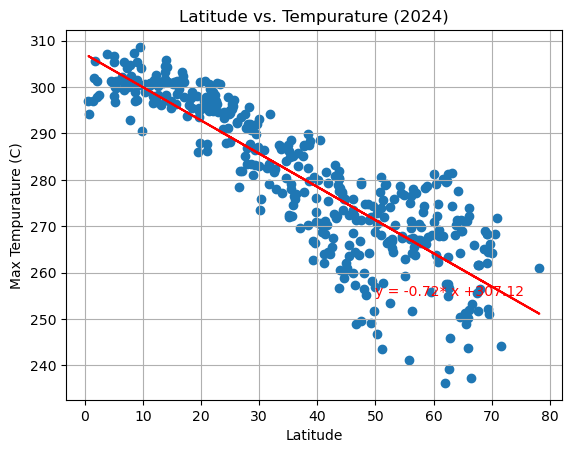

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (C)')
plt.title('Latitude vs. Tempurature (2024)')

north_temp,slope,intercept,rvalue = calc_lin_req(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
line_eq = "y = "+ str(round(slope,2)) + "* x +" + str(round(intercept,2))

plt.plot(northern_hemi_df['Lat'],north_temp,color='red')
plt.annotate(line_eq,(50,255),color='red')
print(f'The r-value is {rvalue}')

The r-value is 0.6199805508623661


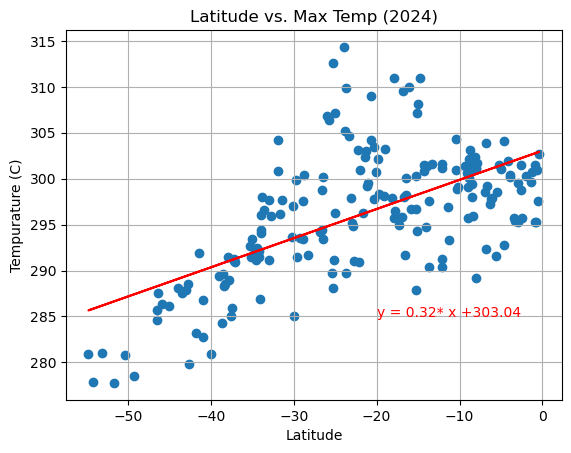

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Tempurature (C)')
plt.title('Latitude vs. Max Temp (2024)')

south_temp,slope,intercept,rvalue = calc_lin_req(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],south_temp,color='red')


line_eq = "y = "+ str(round(slope,2)) + "* x +" + str(round(intercept,2))
plt.annotate(line_eq,(-20,285),color='red')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the graphs above, it can be observed that the tempurature decreases the more you move away from the equator starting from 310 celsius and decreasing to approximately 240 celsius or lower at an 80 latitude. The tempurature increases as you move closer to the equator. The tempurature starts between 275 and 285 celsius at -50 latitude and increases to approximately 305 to 310 celsius at the hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4009963767193167


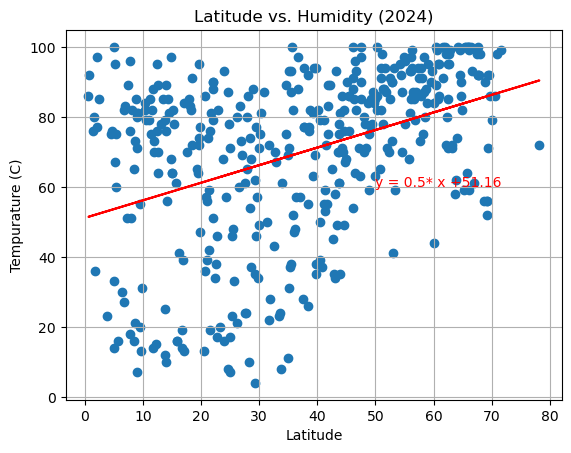

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity (2024)')

north_humid,slope,intercept,rvalue = calc_lin_req(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

plt.plot(northern_hemi_df['Lat'],north_humid,color='red')

line_eq = "y = "+ str(round(slope,2)) + "* x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,60),color='red')
print(f'The r-value is {rvalue}')

The r-value is 0.03901853406214599


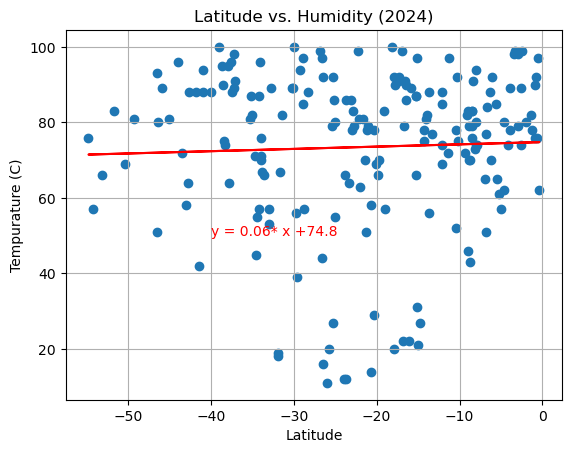

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity (2024)')

south_humid,slope,intercept,rvalue = calc_lin_req(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

plt.plot(southern_hemi_df['Lat'],south_humid,color='red')

line_eq = "y = "+ str(round(slope,2)) + "* x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40,50),color='red')
print(f'The r-value is {rvalue}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the northern hemisphere graph, humidity levels range between 0 and 100 at the hemisphere and remain consistent moving towards 40 latitude. Humidity levels start to range between 40 and 100 as you move away from the equator towards a 70 and 80 latitude. It can also be oserved that as yo move away from the hemsiphere humidity levels very less and tend to increase. 

Based on thesouthern hemisphere graph, there is no obviouse relationship between the two variables. The slope is less that 1 with an r-value closer to 0 which indicates a weak relationship. However, it can be observed that humidity levels range between 40 and 100 between -50 and -30 latitude and then humidity levels start to range between 0 and 100 between -30 and -10 latitude. Humidity levels consistently cluster between 60 and 100 moving towards or away from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.24441625430589223


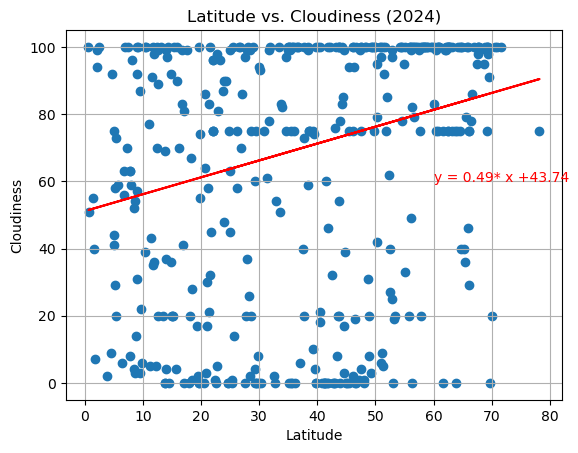

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness (2024)')



north_cloud,slope,intercept,rvalue = calc_lin_req(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

plt.plot(northern_hemi_df['Lat'],north_humid,color='red')

line_eq = "y = "+ str(round(slope,2)) + "* x +" + str(round(intercept,2))
plt.annotate(line_eq,(60,60),color='red')
print(f'The r-value is {rvalue}')

The r-value is 0.16567205713117747


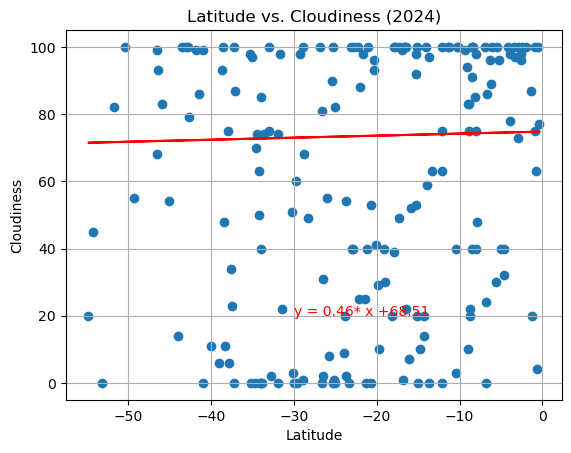

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness (2024)')


south_cloud,slope,intercept,rvalue = calc_lin_req(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

plt.plot(southern_hemi_df['Lat'],south_humid,color='red')

line_eq = "y = "+ str(round(slope,2)) + "* x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,20),color='red')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

northern hemisphere:
- There doesn't seem to be an obvious relationship between cloudiness and latitude. There appears to be a consistent cluster of cloudiness at 100, 75, 20, and 0 moving towards or away from the equator. 

southern hemisphere: There doesn't seem to be an obvious relationship between cloudiness and latitude. The data does indicate a cluster of data to be at 100 as you move towards the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.005369919259863902


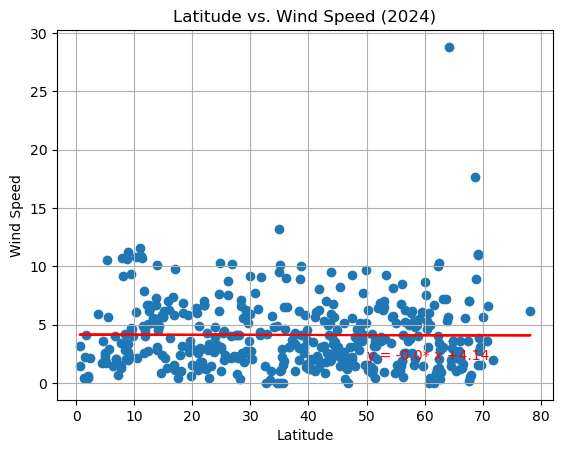

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed (2024)')


north_wind,slope,intercept,rvalue = calc_lin_req(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

plt.plot(northern_hemi_df['Lat'],north_wind,color='red')

line_eq = "y = "+ str(round(slope,2)) + "* x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,2),color='red')
print(f'The r-value is {rvalue}')

The r-value is -0.21388175149356098


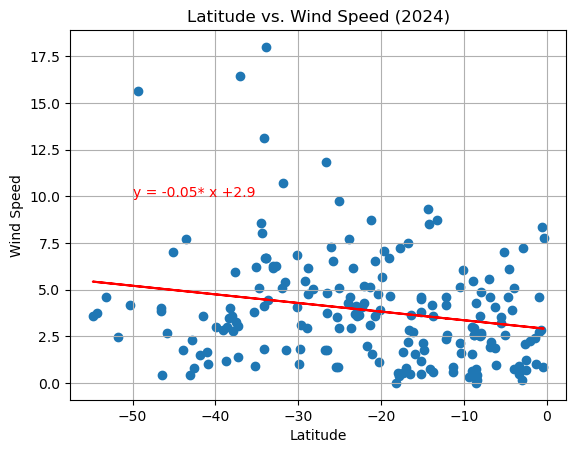

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed (2024)')


south_wind,slope,intercept,rvalue = calc_lin_req(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

plt.plot(southern_hemi_df['Lat'],south_wind,color='red')

line_eq = "y = "+ str(round(slope,2)) + "* x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,10),color='red')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, windspeeds range between 0 and 10 mph but more frequently ranging between 0 and 5. This is consistent as you move towards or away from the hemisphere. Wind speeds can get as high as 30 mph as you move away from the equator.
In the southern hemisphere, windspeeds range between 0 and 10 mph but more freqeuntly rannging between 0 and 5. The data clusters between 7.5 and 0 as you move towards the equator. Windspeends range higher as you move away from the equator. Wind speeds can get as high as 17.5. 